In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from datetime import datetime
import json
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = None
with open('./IntermediateData/zanek_initial_results.json', 'r') as json_file:
    data = json.load(json_file)

In [3]:
def parse_date(date_str):
    return datetime.strptime(date_str, '%m/%d/%Y')

# Sort the dictionary by date (converted to datetime)
data = {key: data[key] for key in sorted(data, key=parse_date)}

# Analysis Bits:

1. Winrate percentage 
2. Time of trades exited 
4. Running PnL graph 
5. Avg & Median win/loss
6. Wins by month and years

In [4]:
#first create a function to return data for analysis paramterized on what years we want to show

In [20]:
#array of years in strings 
def granulize(years):
    #new data dict to return
    filtered_data = {}
    if years[0] == 'all':
        for key, value in data.items():
            if value == None:
                continue
            filtered_data[key] = value
    else:
        for year in years:
            #loop through years in the array of years we want 
            for key, value in data.items():
                if value == None:
                    continue
                #if the key date contains the year, then we want that data, so we add it to the new dict
                if year in key:
                    filtered_data[key] = value
        
    return filtered_data

# Change or add years to the list to get years to analyze data

In [21]:
years = ['all']

In [22]:
filtered_data = granulize(years)

In [23]:
print(filtered_data)

{'10/18/2021': [{'Location': 15060.0, 'Direction': 'Short', 'RR': 33.0}, '09:40:00', False], '10/19/2021': [{'Location': 15337.25, 'Direction': 'Long', 'RR': 32.5}, '10:55:00', True], '10/20/2021': [{'Location': 15408.25, 'Direction': 'Short', 'RR': 21.5}, '09:40:00', False], '10/21/2021': [{'Location': 15366.5, 'Direction': 'Long', 'RR': 32.75}, '10:05:00', True], '10/22/2021': [{'Location': 15437.75, 'Direction': 'Long', 'RR': 33.5}, '09:45:00', False], '10/25/2021': [{'Location': 15393.0, 'Direction': 'Short', 'RR': 41.25}, '09:40:00', True], '10/26/2021': [{'Location': 15632.5, 'Direction': 'Long', 'RR': 52.75}, '10:15:00', True], '10/27/2021': [{'Location': 15566.0, 'Direction': 'Short', 'RR': 35.75}, '09:40:00', False], '10/28/2021': [{'Location': 15653.75, 'Direction': 'Short', 'RR': 34.0}, '09:45:00', False], '10/29/2021': [{'Location': 15653.75, 'Direction': 'Long', 'RR': 38.25}, '09:55:00', True], '11/1/2021': [{'Location': 15829.5, 'Direction': 'Short', 'RR': 39.25}, '10:00:

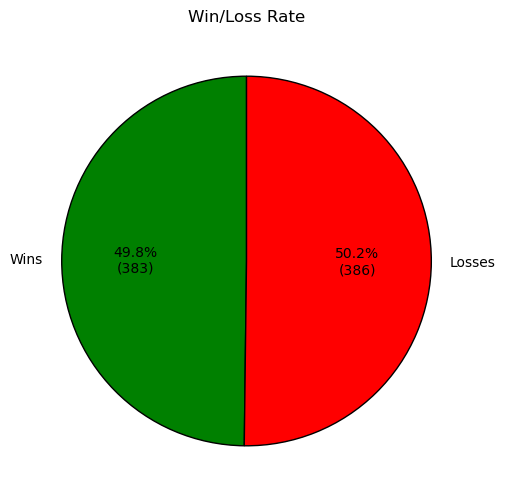

In [24]:
def getWinRate(data):
    win_count = 0
    loss_count = 0
    
    for key, value in data.items():
        if value[2]: 
            win_count += 1
        else:
            loss_count += 1
    
    return win_count, loss_count

# Get win and loss counts
win_count, loss_count = getWinRate(filtered_data)

# Data for the pie chart
labels = ['Wins', 'Losses']
sizes = [win_count, loss_count]

# Function to display both percentage and raw values
def autopct_with_count(pct, sizes):
    total = sum(sizes)
    count = int(round(pct * total / 100.0))  # Calculate the count based on the percentage
    return f'{pct:.1f}%\n({count})'  # Return formatted string with percentage and count

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct=lambda pct: autopct_with_count(pct, sizes),
        startangle=90, colors=['green', 'red'], wedgeprops={'edgecolor': 'black'})

# Set title
plt.title('Win/Loss Rate')

# Show plot
plt.show()


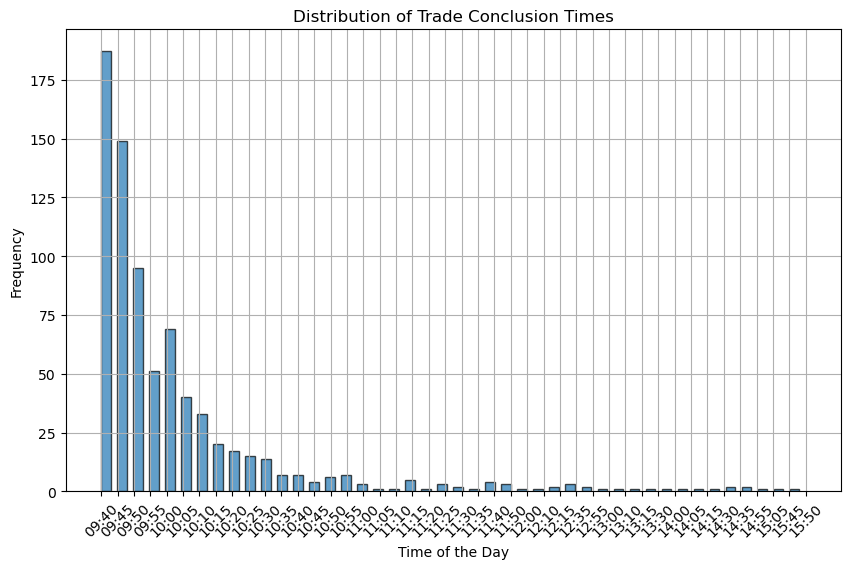

In [25]:
def getTradeTimes(data):
    # Extract the times of trade conclusions (value[2] contains the time)
    trade_times = []
    for key, value in data.items():
        trade_time = value[1]  # Get time from the 3rd element of the tuple
        trade_times.append(trade_time)
    return trade_times

trade_times = getTradeTimes(filtered_data)

# Convert the time strings to datetime objects
time_series = pd.to_datetime(trade_times, format='%H:%M:%S')

# Extract the hour and minute as a string for plotting
time_strings = time_series.strftime('%H:%M')

# Sort time strings in chronological order
sorted_time_strings = sorted(time_strings, key=lambda x: pd.to_datetime(x, format='%H:%M'))

# Plotting the histogram of trade conclusion times
plt.figure(figsize=(10, 6))

# Create histogram using the sorted time strings as bins
plt.hist(sorted_time_strings, bins=len(set(sorted_time_strings)), edgecolor='black', alpha=0.7, width=0.6)

# Label the chart
plt.title('Distribution of Trade Conclusion Times')
plt.xlabel('Time of the Day')
plt.ylabel('Frequency')

# Sort the x-axis labels to show time in correct order
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

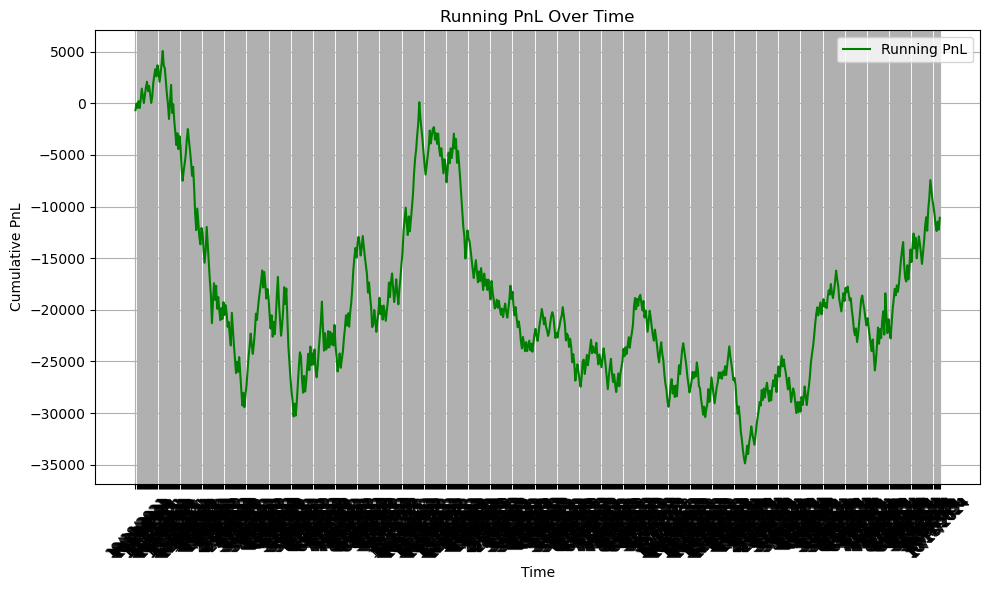

In [26]:
def getPnL(data):
    """
    Assuming each entry in `data` has a PnL value (we'll take the 'RR' value as a placeholder for PnL).
    """
    pnl_values = []
    for key, value in data.items():
        if value[2]:
            pnl_values.append(value[0].get('RR', 0) * 20) 
        else:
            pnl_values.append(value[0].get('RR', 0) * -20)  

    return pnl_values

def plot_running_pnl(pnl_values, times):
    """
    Plot the running PnL based on trade times and PnL values.
    """
    # Calculate the cumulative sum of PnL values
    cumulative_pnl = pd.Series(pnl_values).cumsum()

    # Create a plot of the running PnL
    plt.figure(figsize=(10, 6))
    plt.plot(times, cumulative_pnl, label="Running PnL", color='green')

    # Label the chart
    plt.title('Running PnL Over Time')
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL')

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    
pnl_values = getPnL(filtered_data)

# Get the times of trade conclusions (to use as x-axis)
times = list(filtered_data.keys())

# Plot the running PnL
plot_running_pnl(pnl_values, times)


In [27]:
def calculate_avg_and_median(data):
    # Separate wins and losses based on the last item in the tuple (True for win, False for loss)
    wins = []
    losses = []
    
    for key, value in data.items():
        pnl = value[0].get('RR', 0)  # Extract the PnL (RR value)
        is_win = value[2]  # The 'True' or 'False' indicating a win or loss
        
        if is_win:
            wins.append(pnl)
        else:
            losses.append(pnl)
    
    # Convert lists to pandas series to easily calculate stats
    wins_series = pd.Series(wins)
    losses_series = pd.Series(losses)
    
    # Calculate average and median for wins and losses
    avg_win = wins_series.mean() if len(wins) > 0 else 0
    median_win = wins_series.median() if len(wins) > 0 else 0
    avg_loss = losses_series.mean() if len(losses) > 0 else 0
    median_loss = losses_series.median() if len(losses) > 0 else 0
    
    return {
        "avg_win": avg_win,
        "median_win": median_win,
        "avg_loss": avg_loss,
        "median_loss": median_loss
    }

stats = calculate_avg_and_median(filtered_data)

print("Average and Median of Wins and Losses:")
print(f"Avg Win: {stats['avg_win']}, Median Win: {stats['median_win']}")
print(f"Avg Loss: {stats['avg_loss']}, Median Loss: {stats['median_loss']}")


Average and Median of Wins and Losses:
Avg Win: 52.58355091383812, Median Win: 49.25
Avg Loss: 53.61010362694301, Median Loss: 49.375


<Figure size 1200x600 with 0 Axes>

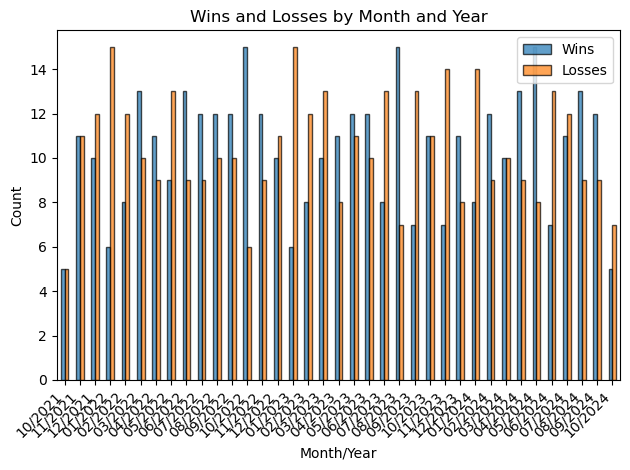

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_wins_and_losses_by_month(data):
    # Dictionary to store wins and losses by month and year
    monthly_wins_losses = defaultdict(lambda: {"wins": 0, "losses": 0})
    
    # Iterate over the trades
    for key, value in data.items():
        trade_date = pd.to_datetime(key, format='%m/%d/%Y')
        pnl = value[0].get('RR', 0)  # Get the RR value (PnL)
        is_win = value[2]  # Check if it's a win or loss (True = Win, False = Loss)
        
        # Create a string like "01/2024" for grouping by month and year
        month_year = trade_date.strftime('%m/%Y')
        
        if is_win:
            monthly_wins_losses[month_year]["wins"] += 1
        else:
            monthly_wins_losses[month_year]["losses"] += 1
    
    return monthly_wins_losses

# Calculate wins and losses by month and year
monthly_wins_losses = calculate_wins_and_losses_by_month(filtered_data)

# Convert to a DataFrame for easier plotting
df = pd.DataFrame.from_dict(monthly_wins_losses, orient='index')

# Plotting the wins and losses by month and year
plt.figure(figsize=(12, 6))
df.plot(kind='bar', stacked=False, edgecolor='black', alpha=0.7)

# Set chart title and labels
plt.title('Wins and Losses by Month and Year')
plt.xlabel('Month/Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Wins', 'Losses'])
plt.tight_layout()

# Show the plot
plt.show()
